In [1]:
import mglearn

In [14]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
import pandas as pd
import numpy as np

In [3]:
### 한글 폰트 설정
import matplotlib
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import platform

path = "C:/Windows/Fonts/malgun.ttf"
if platform.system() == "Windows":
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
elif platform.system()=="Darwin":
    rc('font', family='AppleGothic')
else:
    print("Unknown System")
    
matplotlib.rcParams['axes.unicode_minus'] = False

%matplotlib inline

In [4]:
boston = load_boston()

In [5]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [6]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [7]:
df_boston['target'] = pd.Series(boston.target)

In [8]:
df_boston

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [10]:
x = df_boston.loc[:, 'CRIM':'LSTAT']
y = boston.target

In [11]:
nor_X = MinMaxScaler().fit_transform(x)

In [15]:
print(np.min(nor_X[0]), np.max(nor_X[0]))

0.0 0.9999999999999999


In [18]:
ex_X = PolynomialFeatures(degree=2, include_bias=False).fit_transform(nor_X)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(ex_X, y, random_state=42)

In [22]:
from sklearn.linear_model import LinearRegression
ex_model = LinearRegression().fit(X_train, y_train)
print(ex_model.score(X_train, y_train), ex_model.score(X_test, y_test))

0.9448313975211593 0.7758378393351696


In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso_m = Lasso(alpha=0.01).fit(X_train, y_train)
print(lasso_m.score(X_train, y_train), lasso_m.score(X_test, y_test))

0.8865033777946089 0.80359225764207


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.848133364149362, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [25]:
lasso_m = Lasso(alpha=0.02).fit(X_train, y_train)
print(lasso_m.score(X_train, y_train), lasso_m.score(X_test, y_test))

0.8624196178431925 0.8023299172059395


In [26]:
lasso_m = Lasso(alpha=0.03).fit(X_train, y_train)
print(lasso_m.score(X_train, y_train), lasso_m.score(X_test, y_test))

0.8325370062680149 0.7875123124894232


In [27]:
lasso_m = Lasso(alpha=0.04).fit(X_train, y_train)
print(lasso_m.score(X_train, y_train), lasso_m.score(X_test, y_test))

0.8182107037247353 0.7685687843182059


In [29]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))

0.8700969775259918 0.8145421818415555


In [32]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))

0.9174870139232212 0.824649187531465


In [33]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.01).fit(X_train, y_train)
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))

0.9357645261988872 0.8144760713008301


In [34]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.001).fit(X_train, y_train)
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))

0.943369874890347 0.8060374994056108


In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=0.02).fit(X_train, y_train)
print(ridge.score(X_train, y_train), ridge.score(X_test, y_test))

0.9314432855025697 0.8165090789757603


In [36]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
print("학습용 데이터 세트 점수 : {:.2f}".format(lasso.score(X_train, y_train)))
print("테스트 데이터 세트 점수 : {:.2f}".format(lasso.score(X_test, y_test)))

학습용 데이터 세트 점수 : 0.27
테스트 데이터 세트 점수 : 0.26


In [37]:
lasso00001 = Lasso(alpha=0.0001).fit(X_train, y_train)
print("학습용 데이터 점수 : {:.2f}".format(lasso00001.score(X_train, y_train)))
print("테스트 데이터 점수 : {:.2f}".format(lasso00001.score(X_test, y_test)))

학습용 데이터 점수 : 0.94
테스트 데이터 점수 : 0.78


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1061.5581359471444, tolerance: 3.361037625329815
  model = cd_fast.enet_coordinate_descent(


In [38]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print(ridge01)
print("훈련 세트 점수 : {:.2f}".format(ridge01.score(X_train, y_train)))
print("테스트 세트 점수 : {:.2f}".format(ridge01.score(X_test, y_test)))

Ridge(alpha=0.1)
훈련 세트 점수 : 0.92
테스트 세트 점수 : 0.82


In [40]:
ridge_p = [10, 5, 1, 0.1, 0.01, 0]

for i in ridge_p:
    ridge = Ridge(alpha=i).fit(X_train, y_train)
    
    print("alpha : {}".format(i))
    print("훈련 데이터 세트 점수 : {:.2f}".format(ridge.score(X_train, y_train)))
    print("테스트 데이터 세트 점수 : {:.2f}".format(ridge.score(X_test, y_test)))

alpha : 10
훈련 데이터 세트 점수 : 0.77
테스트 데이터 세트 점수 : 0.73
alpha : 5
훈련 데이터 세트 점수 : 0.80
테스트 데이터 세트 점수 : 0.76
alpha : 1
훈련 데이터 세트 점수 : 0.87
테스트 데이터 세트 점수 : 0.81
alpha : 0.1
훈련 데이터 세트 점수 : 0.92
테스트 데이터 세트 점수 : 0.82
alpha : 0.01
훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.81
alpha : 0
훈련 데이터 세트 점수 : 0.94
테스트 데이터 세트 점수 : 0.78


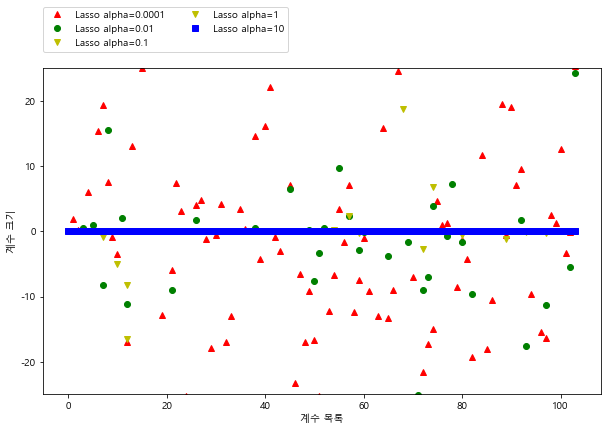

In [53]:
lasso = Lasso(alpha=1).fit(X_train, y_train)
lasso01 = Lasso(alpha=0.1, max_iter=100000).fit(X_train, y_train)
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
lasso10 = Lasso(alpha=10, max_iter=100000).fit(X_train, y_train)

plt.figure(figsize=(10,6))
plt.plot(lasso00001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(lasso001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(lasso01.coef_, 'yv', label="Lasso alpha=0.1")
plt.plot(lasso.coef_, 'yv', label="Lasso alpha=1")
plt.plot(lasso10.coef_, "bs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()

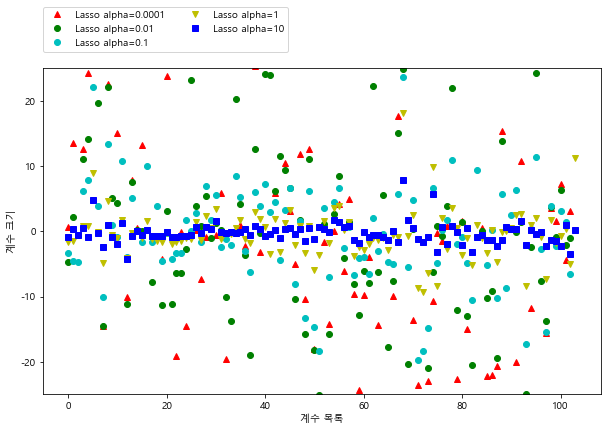

In [69]:
ridge = Ridge(alpha=1).fit(X_train, y_train)
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
ridge001 = Ridge(alpha=0.01).fit(X_train, y_train)
ridge0001 = Ridge(alpha=0.001).fit(X_train, y_train)
ridge10 = Ridge(alpha=10).fit(X_train, y_train)

plt.figure(figsize=(10,6))
plt.plot(ridge0001.coef_, "r^", label="Lasso alpha=0.0001")
plt.plot(ridge001.coef_, 'go', label="Lasso alpha=0.01")
plt.plot(ridge01.coef_, 'co', label="Lasso alpha=0.1")
plt.plot(ridge.coef_, 'yv', label="Lasso alpha=1")
plt.plot(ridge10.coef_, "bs", label="Lasso alpha=10")

plt.xlabel("계수 목록")
plt.ylabel("계수 크기")
plt.ylim(-25, 25)
plt.legend(ncol=2, loc=(0,1.05))
plt.show()